# Library

In [1]:
import os
import random
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#os.environ['TF_DETERMINISTIC_OPS'] = '1'
plt.rcParams["font.family"] = "Malgun Gothic"  

# Prep

In [2]:
data_path = r"C:\Users\james\J_Data_Lab\Project-FXCast\data\df_investing2.csv"
df = pd.read_csv(data_path)

In [3]:
def eda_basic_info(df, df_name="DataFrame"):
    print(f"\n===== {df_name} =====")
    print("Head (5 rows):")
    display(df.head())
    
    print("\nInfo:")
    print(df.info())
    
    print("\nDescribe (numeric):")
    display(df.describe())
    
    print("\nNull counts:")
    print(df.isnull().sum())
    
    print("="*40)

In [4]:
eda_basic_info(df, "df")


===== df =====
Head (5 rows):


,date,USD_KRW 종가,USD_KRW 시가,KOSPI 종가,KOSPI 거래량,KOSDAQ 종가,KOSDAQ 거래량,WTI Price,XAU Price,DJI 종가,DJI 거래량,SP500 종가,M1,M2,한국 정책금리,미국 정책금리,CPI,PPI,경상수지
0,2024-12-30,1469.25,1471.10,2399.49,303960000.0,678.19,644550000.0,70.99,2605.39,42573.73,383300000.0,5906.94,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
1,2024-12-27,1472.50,1468.40,2404.77,311290000.0,665.97,814130000.0,70.08,2620.00,42992.21,376960000.0,5970.84,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
2,2024-12-26,1467.08,1457.21,2429.67,322800000.0,675.64,829290000.0,69.53,2634.43,43325.80,270360000.0,6037.59,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
3,2024-12-24,1458.93,1453.28,2440.52,386780000.0,680.11,645100000.0,69.92,2613.20,43297.03,230410000.0,6040.04,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
4,2024-12-23,1451.28,1446.05,2442.01,428170000.0,679.24,657710000.0,69.34,2612.93,42906.95,449400000.0,5974.07,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1186 non-null   object 
 1   USD_KRW 종가  1186 non-null   float64
 2   USD_KRW 시가  1186 non-null   float64
 3   KOSPI 종가    1186 non-null   float64
 4   KOSPI 거래량   1186 non-null   float64
 5   KOSDAQ 종가   1186 non-null   float64
 6   KOSDAQ 거래량  1186 non-null   float64
 7   WTI Price   1186 non-null   float64
 8   XAU Price   1186 non-null   float64
 9   DJI 종가      1186 non-null   float64
 10  DJI 거래량     1186 non-null   float64
 11  SP500 종가    1186 non-null   float64
 12  M1          1186 non-null   float64
 13  M2          1186 non-null   float64
 14  한국 정책금리     1186 non-null   float64
 15  미국 정책금리     1186 non-null   float64
 16  CPI         1186 non-null   float64
 17  PPI         1186 non-null   float64
 18  경상수지        1186 non-null   float64
dtypes: float64(18), obje

,USD_KRW 종가,USD_KRW 시가,KOSPI 종가,KOSPI 거래량,KOSDAQ 종가,KOSDAQ 거래량,WTI Price,XAU Price,DJI 종가,DJI 거래량,SP500 종가,M1,M2,한국 정책금리,미국 정책금리,CPI,PPI,경상수지
count,1186.000000,1186.000000,1186.000000,1.186000e+03,1186.000000,1.186000e+03,1186.000000,1186.000000,1186.000000,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1186.00000,1186.000000,1186.000000,1186.000000
mean,1256.282968,1256.633221,2596.073440,7.131867e+08,841.160118,1.306049e+09,69.533440,1937.514081,33603.138786,3.687432e+08,4250.179671,1219.394587,3616.388458,2.037789,2.60763,2.811298,111.501433,5333.790894
std,93.743223,93.787299,339.282251,3.554851e+08,114.428855,5.210409e+08,23.291945,263.590609,4657.788950,1.128756e+08,764.021938,103.680673,347.336672,1.303587,2.31595,1.658261,7.401748,4255.906435
min,1083.530000,1083.870000,1457.640000,8.245100e+05,428.350000,6.196200e+08,7.790000,1471.000000,18591.930000,1.170400e+08,2237.400000,944.306400,2935.640300,0.500000,0.25000,-0.200000,98.930000,-4205.000000
25%,1181.822500,1182.460000,2399.310000,4.629025e+08,762.185000,9.524700e+08,62.090000,1778.307500,31022.087500,3.016050e+08,3810.150000,1184.088000,3309.121000,0.548387,0.25000,1.425000,103.890000,1862.000000
50%,1265.610000,1266.325000,2568.480000,6.137650e+08,847.505000,1.170000e+09,73.735000,1870.390000,33913.620000,3.433250e+08,4200.010000,1221.110000,3718.332800,1.750000,1.75000,2.700000,116.270000,6365.000000
75%,1333.020000,1333.395000,2758.637500,8.662025e+08,919.412500,1.500000e+09,82.030000,1985.455000,35627.822500,4.021650e+08,4591.015000,1287.187300,3843.786700,3.500000,5.25000,3.800000,117.500000,7438.000000
max,1472.500000,1471.100000,3305.210000,3.460000e+09,1060.000000,5.070000e+09,126.470000,2786.190000,45014.040000,1.220000e+09,6090.270000,1371.920900,4183.535400,3.500000,5.50000,6.300000,119.560000,13096.000000



Null counts:
date          0
USD_KRW 종가    0
USD_KRW 시가    0
KOSPI 종가      0
KOSPI 거래량     0
KOSDAQ 종가     0
KOSDAQ 거래량    0
WTI Price     0
XAU Price     0
DJI 종가        0
DJI 거래량       0
SP500 종가      0
M1            0
M2            0
한국 정책금리       0
미국 정책금리       0
CPI           0
PPI           0
경상수지          0
dtype: int64


# Prep 2

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
target_column = 'USD_KRW 종가'
features = df.drop(columns=['date', target_column])  
target = df[target_column].values                    

features = features.values  # numpy array 변환

# 스케일러 선언
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# 스케일링
features_scaled = scaler_x.fit_transform(features)
target_scaled = scaler_y.fit_transform(target.reshape(-1, 1))

In [7]:
target_column = 'USD_KRW 종가'
# 제거할 컬럼
columns_to_drop = ['date', target_column, '미국 정책금리', 'PPI', 'SP500 종가', 'M2', 'CPI', '한국 정책금리']

# 독립변수 
features = df.drop(columns=columns_to_drop)
# 종속변수
target = df[target_column].values

# numpy array로 변환
features = features.values

# 스케일러 선언
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# 스케일링 수행
features_scaled = scaler_x.fit_transform(features)
target_scaled = scaler_y.fit_transform(target.reshape(-1, 1))

In [8]:
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_sequences(features_scaled, target_scaled, window_size)

# 시간 순서대로 학습/테스트 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modeling

In [9]:
# -----------------------------
# LSTM 모델
# -----------------------------
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, X.shape[2])),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train, y_train, 
                              epochs=50, batch_size=16, verbose=1, 
                              callbacks=[early_stop])

# -----------------------------
# GRU 모델
# -----------------------------
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, X.shape[2])),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()

gru_history = gru_model.fit(X_train, y_train, 
                            epochs=50, batch_size=16, verbose=1, 
                            callbacks=[early_stop])

# -----------------------------
# CNN-LSTM 모델
# -----------------------------
cnn_lstm_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', 
           input_shape=(window_size, X.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
cnn_lstm_model.compile(optimizer='adam', loss='mse')
cnn_lstm_model.summary()

cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train,
                                      epochs=50, batch_size=16, verbose=1,
                                      callbacks=[early_stop])

# -----------------------------
# CNN-GRU 모델
# -----------------------------
cnn_gru_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu',
           input_shape=(window_size, X.shape[2])),
    MaxPooling1D(pool_size=2),
    GRU(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
cnn_gru_model.compile(optimizer='adam', loss='mse')
cnn_gru_model.summary()

cnn_gru_history = cnn_gru_model.fit(X_train, y_train,
                                    epochs=50, batch_size=16, verbose=1,
                                    callbacks=[early_stop])

C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,451 (48.64 KB)

 Trainable params: 12,451 (48.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0687  
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027    
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020
Epoch 16/50


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           9,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,501 (37.11 KB)

 Trainable params: 9,501 (37.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1386  
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 16/50
59/59

C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 32)               │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,387 (67.92 KB)

 Trainable params: 17,387 (67.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1657  
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 16/50
59/59

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 4, 32)               │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,387 (52.29 KB)

 Trainable params: 13,387 (52.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1080  
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022    
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 16/50
5

In [10]:
# 테스트셋 예측
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)
cnn_lstm_pred = cnn_lstm_model.predict(X_test)
cnn_gru_pred = cnn_gru_model.predict(X_test)

# 스케일 복원
y_test_inv = scaler_y.inverse_transform(y_test)
lstm_pred_inv = scaler_y.inverse_transform(lstm_pred)
gru_pred_inv = scaler_y.inverse_transform(gru_pred)
cnn_lstm_pred_inv = scaler_y.inverse_transform(cnn_lstm_pred)
cnn_gru_pred_inv = scaler_y.inverse_transform(cnn_gru_pred)

# MSE, MAPE 계산
lstm_mse = mean_squared_error(y_test_inv, lstm_pred_inv)
gru_mse = mean_squared_error(y_test_inv, gru_pred_inv)
cnn_lstm_mse = mean_squared_error(y_test_inv, cnn_lstm_pred_inv)
cnn_gru_mse = mean_squared_error(y_test_inv, cnn_gru_pred_inv)

lstm_mape = mean_absolute_percentage_error(y_test_inv, lstm_pred_inv) * 100
gru_mape = mean_absolute_percentage_error(y_test_inv, gru_pred_inv) * 100
cnn_lstm_mape = mean_absolute_percentage_error(y_test_inv, cnn_lstm_pred_inv) * 100
cnn_gru_mape = mean_absolute_percentage_error(y_test_inv, cnn_gru_pred_inv) * 100

print("===== 평가 지표(MSE, MAPE) =====")
print("LSTM     : MSE={:.4f}, MAPE={:.3f}%".format(lstm_mse, lstm_mape))
print("GRU      : MSE={:.4f}, MAPE={:.3f}%".format(gru_mse, gru_mape))
print("CNN-LSTM : MSE={:.4f}, MAPE={:.3f}%".format(cnn_lstm_mse, cnn_lstm_mape))
print("CNN-GRU  : MSE={:.4f}, MAPE={:.3f}%".format(cnn_gru_mse, cnn_gru_mape))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
===== 평가 지표(MSE, MAPE) =====
LSTM     : MSE=136.6112, MAPE=0.797%
GRU      : MSE=165.6411, MAPE=0.996%
CNN-LSTM : MSE=200.0351, MAPE=0.963%
CNN-GRU  : MSE=586.6646, MAPE=1.412%


In [ ]:
===== 평가 지표(MSE, MAPE) =====
LSTM     : MSE=136.6112, MAPE=0.797%
GRU      : MSE=165.6411, MAPE=0.996%
CNN-LSTM : MSE=200.0351, MAPE=0.963%
CNN-GRU  : MSE=586.6646, MAPE=1.412%

In [ ]:
===== 평가 지표(MSE, MAPE) =====
LSTM     : MSE=208.1537, MAPE=1.044%
GRU      : MSE=186.1464, MAPE=1.027%
CNN-LSTM : MSE=159.9242, MAPE=0.819%
CNN-GRU  : MSE=213.8788, MAPE=1.011%

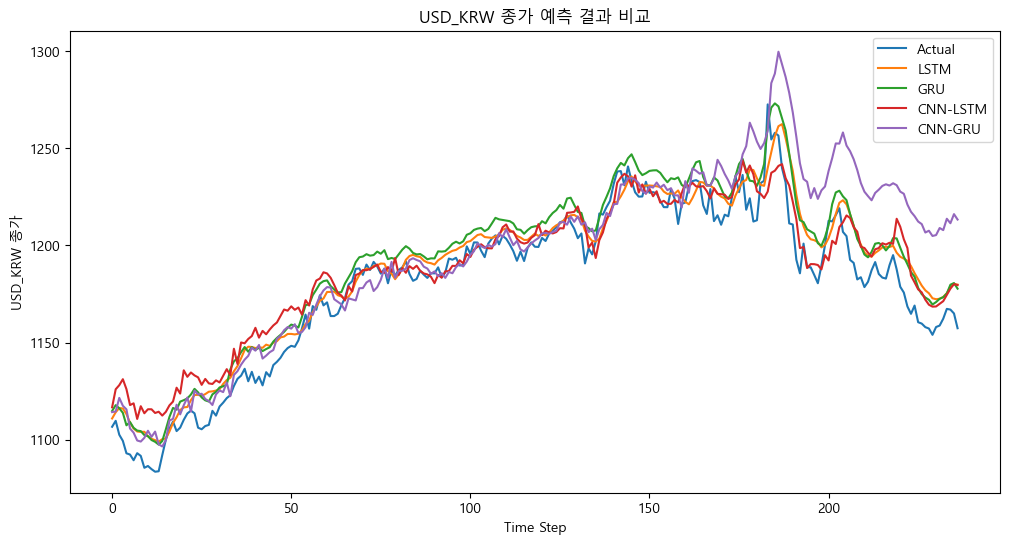

In [11]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_pred_inv, label='LSTM')
plt.plot(gru_pred_inv, label='GRU')
plt.plot(cnn_lstm_pred_inv, label='CNN-LSTM')
plt.plot(cnn_gru_pred_inv, label='CNN-GRU')
plt.title('USD_KRW 종가 예측 결과 비교')
plt.xlabel('Time Step')
plt.ylabel('USD_KRW 종가')
plt.legend()
plt.show()

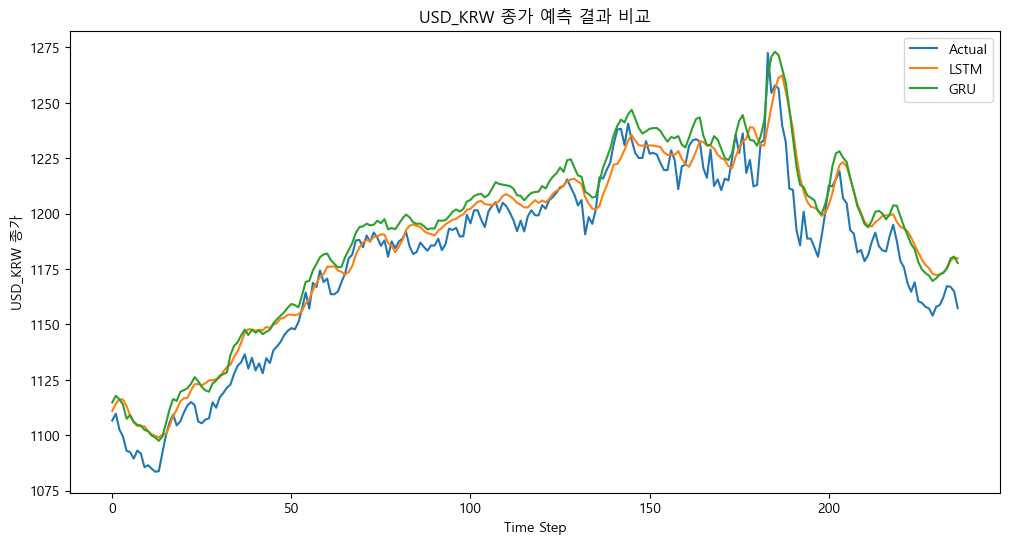

In [12]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_pred_inv, label='LSTM')
plt.plot(gru_pred_inv, label='GRU')
#plt.plot(cnn_lstm_pred_inv, label='CNN-LSTM')
#plt.plot(cnn_gru_pred_inv, label='CNN-GRU')
plt.title('USD_KRW 종가 예측 결과 비교')
plt.xlabel('Time Step')
plt.ylabel('USD_KRW 종가')
plt.legend()
plt.show()

In [7]:
## 0. Seed 설정
#seed = 123
#p.random.seed(seed)
#tf.random.set_seed(seed)
#random.seed(seed)

In [8]:
## 1. Prep
# datetime으로 변환 후 정렬
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Train: 2020 ~ 2023, Test : 2023 ~ 2024
train_df = df[df['date'] < '2023-01-01'].copy()
test_df = df[df['date'] >= '2023-01-01'].copy()

# date 컬럼 제거
train_data = train_df.drop(columns=['date']).values
test_data = test_df.drop(columns=['date']).values

# MinMax 스케일링 
scaler = MinMaxScaler()
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [9]:
## 2. DataSet
def create_sequences(data, window_size, target_index=0):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_index])
    return np.array(X), np.array(y)

window_size = 10  # 과거 시점의 길이 (시퀀스 길이) (몇으로 설정?)
X_train, y_train = create_sequences(train_scaled, window_size, target_index=0) # target_index=0 은 USD_KRW 종가
X_test, y_test = create_sequences(test_scaled, window_size, target_index=0)

# CNN-LSTM, CNN-GRU 모델은 4차원 입력 필요 (samples, n_seq, n_steps, n_features)
n_seq = 2
n_steps = window_size // n_seq  
n_features = X_train.shape[2]

X_train_cnn = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test_cnn = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

In [10]:
## 3. Build Model
# LSTM
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# GRU
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# CNN_LSTM
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# CNN_GRU
def build_cnn_gru_model(input_shape):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# 모델 입력 shape 설정
lstm_input_shape = (X_train.shape[1], n_features)  # (window_size, n_features)
cnn_input_shape = (n_seq, n_steps, n_features)

# 각 모델 생성
lstm_model = build_lstm_model(lstm_input_shape)
gru_model = build_gru_model(lstm_input_shape)
cnn_lstm_model = build_cnn_lstm_model(cnn_input_shape)
cnn_gru_model = build_cnn_gru_model(cnn_input_shape)

C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
## 4. 모델 학습
epochs = 100
batch_size = 64

print("$학습 중$")
history_lstm = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_gru = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_cnn_gru = cnn_gru_model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

## 5. 테스트셋 평가 및 성능 지표 출력 (MSE, MAPE)
lstm_eval = lstm_model.evaluate(X_test, y_test, verbose=0)
gru_eval = gru_model.evaluate(X_test, y_test, verbose=0)
cnn_lstm_eval = cnn_lstm_model.evaluate(X_test_cnn, y_test, verbose=0)
cnn_gru_eval = cnn_gru_model.evaluate(X_test_cnn, y_test, verbose=0)

print("\n모델 평가 결과:")
print("LSTM     - MSE: {:.4f}, MAPE: {:.4f}".format(lstm_eval[0], lstm_eval[1]))
print("GRU      - MSE: {:.4f}, MAPE: {:.4f}".format(gru_eval[0], gru_eval[1]))
print("CNN-LSTM - MSE: {:.4f}, MAPE: {:.4f}".format(cnn_lstm_eval[0], cnn_lstm_eval[1]))
print("CNN-GRU  - MSE: {:.4f}, MAPE: {:.4f}".format(cnn_gru_eval[0], cnn_gru_eval[1]))

$학습 중$

모델 평가 결과:
LSTM     - MSE: 0.0050, MAPE: 7.8604
GRU      - MSE: 0.0053, MAPE: 7.6087
CNN-LSTM - MSE: 0.0366, MAPE: 23.5856
CNN-GRU  - MSE: 0.0227, MAPE: 17.9882


# Plot

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


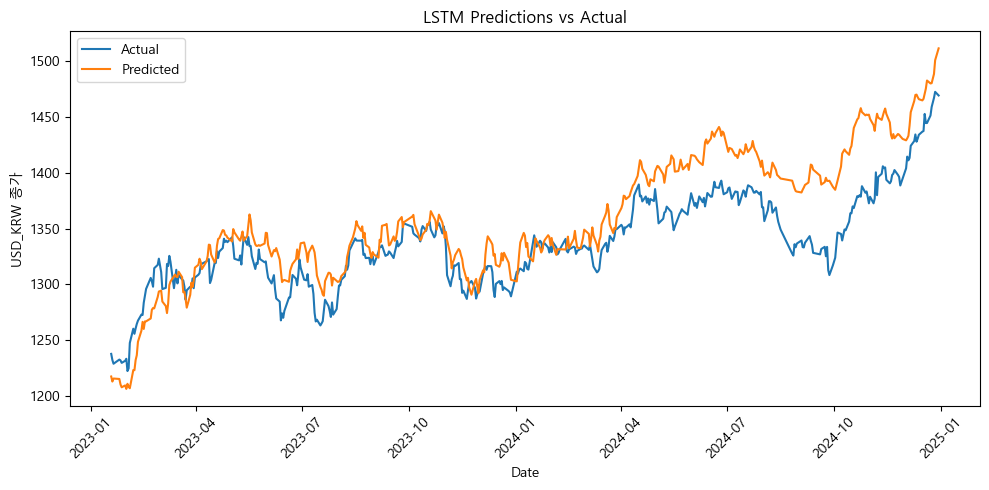

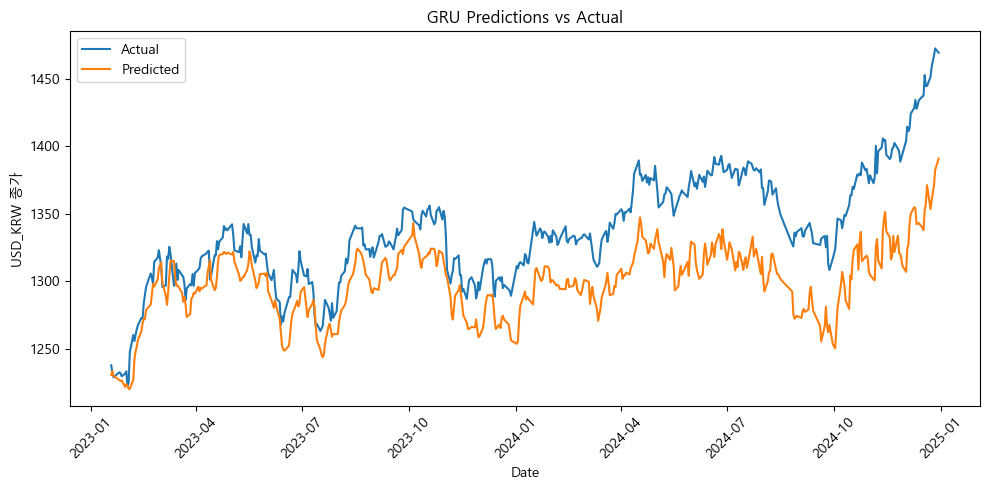

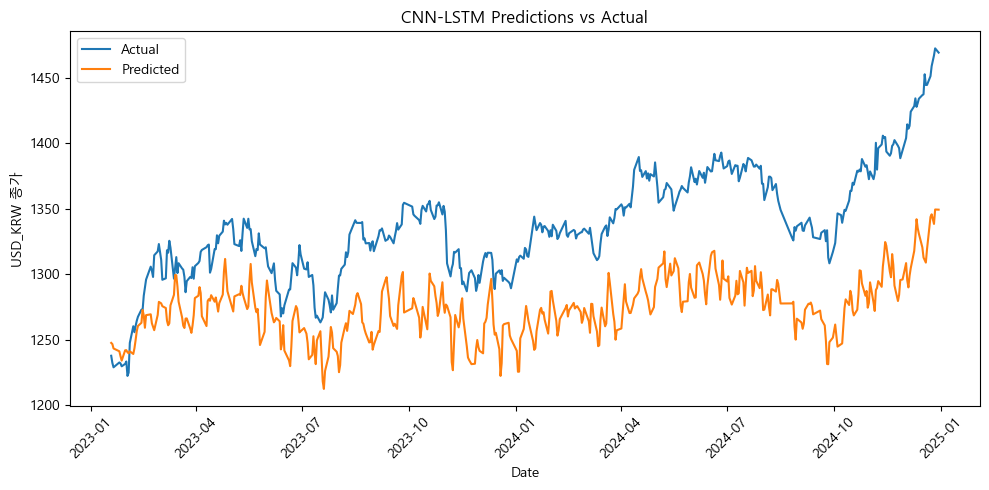

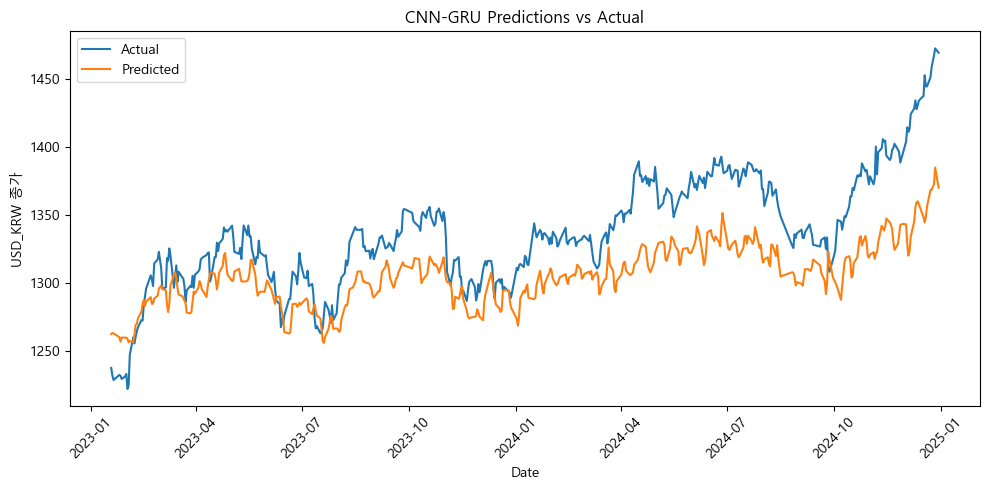

In [12]:
## 6. 시각화
# 테스트셋에 대해 각 모델별 예측값과 실제값을 비교
pred_lstm = lstm_model.predict(X_test)
pred_gru = gru_model.predict(X_test)
pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn)
pred_cnn_gru = cnn_gru_model.predict(X_test_cnn)

# 기존 예측값과 실제 y값 복원
target_min = scaler.data_min_[0]
target_range = scaler.data_range_[0]

y_true_actual = y_test * target_range + target_min
pred_lstm_actual = pred_lstm.flatten() * target_range + target_min
pred_gru_actual = pred_gru.flatten() * target_range + target_min
pred_cnn_lstm_actual = pred_cnn_lstm.flatten() * target_range + target_min
pred_cnn_gru_actual = pred_cnn_gru.flatten() * target_range + target_min

# 날짜 추출
dates_test = test_df['date'].reset_index(drop=True)
x_dates = dates_test[window_size:].values

# 시각화 
def plot_predictions_actual(x_dates, y_true, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(x_dates, y_true, label='Actual')
    plt.plot(x_dates, y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('USD_KRW 종가')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 각 모델별 시각화
plot_predictions_actual(x_dates, y_true_actual, pred_lstm_actual, 'LSTM')
plot_predictions_actual(x_dates, y_true_actual, pred_gru_actual, 'GRU')
plot_predictions_actual(x_dates, y_true_actual, pred_cnn_lstm_actual, 'CNN-LSTM')
plot_predictions_actual(x_dates, y_true_actual, pred_cnn_gru_actual, 'CNN-GRU')